### Extracting Stock Data from Yahoo Finance

In [2]:
#Installing yahoo finance library
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [7]:
#Importing the Yahoo Finance Library
import yfinance as yf
import pandas as pd

#To extract the stock data of the HDFC Bank between '2021-10-19' and end='2022-10-19'

#NSE symbol for HDFC bank
symbol = "HDFCBANK.NS"

#Creating a ticker object
tickerData = yf.Ticker(symbol)

#get the historical prices for this ticker (perid='1d' implies daily data)
tickerDf = tickerData.history(period='1d', start='2021-10-19', end='2022-10-19')

In [8]:
#The extracted data in a data frame
tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-10-19 00:00:00+05:30,1656.193303,1672.997915,1651.794497,1669.291016,4493770,0.0,0
2021-10-20 00:00:00+05:30,1669.686543,1679.225656,1645.319830,1654.611816,5454284,0.0,0
2021-10-21 00:00:00+05:30,1652.585412,1662.618657,1641.761192,1657.033691,4869095,0.0,0
2021-10-22 00:00:00+05:30,1660.789942,1688.369300,1651.547429,1661.432495,6087777,0.0,0
2021-10-25 00:00:00+05:30,1670.576162,1670.576162,1595.252007,1637.955444,8213383,0.0,0
...,...,...,...,...,...,...,...
2022-10-12 00:00:00+05:30,1403.199951,1414.849976,1397.300049,1409.800049,4612525,0.0,0
2022-10-13 00:00:00+05:30,1402.050049,1406.250000,1384.000000,1393.599976,7357117,0.0,0
2022-10-14 00:00:00+05:30,1417.000000,1447.000000,1415.250000,1439.000000,6424960,0.0,0


In [19]:
df_new=tickerDf.reset_index(inplace=False)
df_new.Date=pd.to_datetime(df_new["Date"]).dt.date
#df_new[["Date","Open","High","Low","Close","Volume","Dividends","Stock Splits"]]
df=df_new.set_index('Date')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-10-19,1656.193303,1672.997915,1651.794497,1669.291016,4493770,0.0,0
2021-10-20,1669.686543,1679.225656,1645.319830,1654.611816,5454284,0.0,0
2021-10-21,1652.585412,1662.618657,1641.761192,1657.033691,4869095,0.0,0
2021-10-22,1660.789942,1688.369300,1651.547429,1661.432495,6087777,0.0,0
2021-10-25,1670.576162,1670.576162,1595.252007,1637.955444,8213383,0.0,0
...,...,...,...,...,...,...,...
2022-10-12,1403.199951,1414.849976,1397.300049,1409.800049,4612525,0.0,0
2022-10-13,1402.050049,1406.250000,1384.000000,1393.599976,7357117,0.0,0
2022-10-14,1417.000000,1447.000000,1415.250000,1439.000000,6424960,0.0,0


## Exercise

**Question 1:**

Design a function named 
        
           get_stock_data(symbol, start_date, end_date)

that would take a stock symbol, a start date and an end date and generate a data frame of the above kind.

For example,

            get_stock_data('TATAMOTORS.NS', start_date='2021-10-19', end_date='2022-10-19').head() 

Would return...

                              Open	      High	      Low	     Close	 Volume	   Dividends	Stock Splits
            Date							
            2021-10-19	512.450012	517.400024	476.049988	481.899994	57428637	0	         0
            2021-10-20	481.799988	497.000000	471.250000	486.899994	55444814	0	         0
            2021-10-21	491.750000	510.399994	485.750000	508.000000	52608672	0	         0
            2021-10-22	509.899994	510.700012	487.399994	490.899994	42742785	0	         0
            2021-10-25	493.899994	496.000000	473.250000	479.899994	33107841	0	         0

In [24]:
def get_stock_data(symbol, start_date, end_date):
    sym = symbol+".NS"# adding NS to the symbol name 
    s_date=start_date.split("-") #splitting to string argument to check dates
    e_date=end_date.split("-")
    # Checking dates , whether they are in YYYY-MM-DD format, and printing error if not in format
    if((len(s_date[0])!=4) or int(s_date[1])>12 or int(s_date[2])>31):
        print("Invaid Start Date format, it should be YYYY-MM-DD")
        return None
    if((len(e_date[0])!=4) or int(e_date[1])>12 or int(e_date[2])>31):
        print("Invaid End Date format, it should be YYYY-MM-DD")
        return None

    #Creating a ticker object
    tickerData = yf.Ticker(sym)

    #get the historical prices for this ticker (perid='1d' implies daily data)
    tickerDf = tickerData.history(period='1d', start=start_date, end=end_date)
    df_new=tickerDf.reset_index(inplace=False)
    df_new.Date=pd.to_datetime(df_new["Date"]).dt.date
    #df_new[["Date","Open","High","Low","Close","Volume","Dividends","Stock Splits"]]
    df=df_new.set_index('Date')
    df
    return df


In [51]:
df=get_stock_data('TATAMOTORS', start_date='2021-10-19', end_date='2022-10-19')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-10-19,512.450012,517.400024,476.049988,481.899994,57428637,0,0
2021-10-20,481.799988,497.000000,471.250000,486.899994,55444814,0,0
2021-10-21,491.750000,510.399994,485.750000,508.000000,52608672,0,0
2021-10-22,509.899994,510.700012,487.399994,490.899994,42742785,0,0
2021-10-25,493.899994,496.000000,473.250000,479.899994,33107841,0,0
...,...,...,...,...,...,...,...
2022-10-12,394.549988,398.200012,391.100006,396.549988,14287344,0,0
2022-10-13,396.549988,403.500000,394.549988,399.000000,12584114,0,0
2022-10-14,407.000000,409.200012,395.299988,396.250000,12875470,0,0


**Question 2**

Create a function named

        export_stock_data(symbol, start_date, end_date, directory)
        
that would take a stock symbol, a start date, an end date and a path (directory) to generate a data frame of the above kind and export it as a CSV file in the given directory with the name of the file as the symbol of the stock.



In [26]:
import os #importing os library
def export_stock_data(symbol, start_date, end_date, directory): # receiving arguments and giving default value to directory arg as current working directory
    sym = symbol+'.NS' # adding .NS to symbol
    directory=directory.replace('\\','\\\\')
    s_date=start_date.split("-") #splitting to string argument to check dates
    e_date=end_date.split("-") #splitting to string argument to check dates
    direct=directory+'/NIFTY50/'
    if not os.path.exists(direct):# Syntax Courtesy : Stackoverflow : To check if a directory exists or not.
        os.makedirs(directory+'/NIFTY50/') #creating path for writing csv file 
    path=directory+'/NIFTY50/'+symbol+'.csv'
    # Checking dates , whether they are in YYYY-MM-DD format, and printing error if not in format
    if((len(s_date[0])!=4) or int(s_date[1])>12 or int(s_date[2])>31):
        print("Invaid Start Date format, it should be YYYY-MM-DD")
        return None
    if((len(e_date[0])!=4) or int(e_date[1])>12 or int(e_date[2])>31):
        print("Invaid End Date format, it should be YYYY-MM-DD")
        return None

    #Creating a ticker object
    tickerData = yf.Ticker(sym)

    #get the historical prices for this ticker (perid='1d' implies daily data)
    tickerDf = tickerData.history(period='1d', start=start_date, end=end_date)
    tickerDf.to_csv(path) # writing data frame to csv file
    

In [27]:
export_stock_data('TATAMOTORS','2021-10-19','2022-10-19','E:\PBS\T1\DATA VISUALIZATION')

In [53]:
os.path.exists('E:\PBS\T1\Statistics')

True

**Question 3**

The file nifty50.csv contains the name and symbols of all the 50 stocks of nifty-50.

Use the function named

        export_stock_data(symbol, start_date, end_date, directory)
        
that would take the stock symbol one at a time from the nifty50.csv file to generate a data frame of the above kind and export it as a CSV file inside a NEW FOLDER in the given directory with the name of the file as exactly equal to the symbol of the stock given in the CSV file.

**Note:**

1. The symbols given in the dataset do not have the suffix .NS which needs to be added to the symbols before it can be used in the function.

2. The new folder must be created with the name NIFTY50

3. All the data frames must be exported as a CSV files as saved in the NIFTY50 folder


In [28]:
import pandas as pd
df=pd.read_csv("nifty50.csv")# reading data from csv to pandas dataframe
#df['Symbol'][0]

for i in range(len(df['Symbol'])):# starting for loop to go through all symbol names in dataframe 
    #using function from above question to export all csvs to designated path
    export_stock_data(df['Symbol'][i],'2020-12-30','2021-10-09','E:\PBS\T1\DATA VISUALIZATION')

    

**Question 4**

Create a function called,

    daily_return(df)
    
This function should be able to take a dataframe shown in the example above and calculate the daily return of the close price and output a dataframe with the same number of columns and an additional column named "**Return_Close**". 

The daily return for a day is calculated as follows:

    daily return = (today's price - previous day's price)/(previous day's price)*100

**Note:** You can calculate the daily return starting from the day 2. The return for the day 1 should be set to 0.

In [53]:
def daily_return(df):
    df.reset_index(inplace=False) # restting index to access row index Synatx Courtesy : Stackoverflow
    df["Return_Close"]=0
    for i in range(1,len(df)):
        #calculating the Return close price using .loc method
        df.loc[i,"Return_Close"]=(df.iloc[i,4]-df.iloc[i-1,4])*100/(df.iloc[i-1,4])
        df_new=df.set_index('Date')
        
    return(df_new)
        
        



In [57]:
#daily_return(df)
y=daily_return(df)
y



,Open,High,Low,Close,Volume,Dividends,Stock Splits,Return_Close
Date,,,,,,,,
2021-10-19,512.450012,517.400024,476.049988,481.899994,57428637,0,0,0.000000
2021-10-20,481.799988,497.000000,471.250000,486.899994,55444814,0,0,1.037560
2021-10-21,491.750000,510.399994,485.750000,508.000000,52608672,0,0,4.333540
2021-10-22,509.899994,510.700012,487.399994,490.899994,42742785,0,0,-3.366143
2021-10-25,493.899994,496.000000,473.250000,479.899994,33107841,0,0,-2.240782
...,...,...,...,...,...,...,...,...
2022-10-12,394.549988,398.200012,391.100006,396.549988,14287344,0,0,0.813520
2022-10-13,396.549988,403.500000,394.549988,399.000000,12584114,0,0,0.617832
2022-10-14,407.000000,409.200012,395.299988,396.250000,12875470,0,0,-0.689223


In [165]:
type(y)
y.to_csv("E:\\PBS\\T1\\Statistics\\NIFTY50\\NTPC.csv",mode='w+' )

**Question 5**

Consider the NIFTY50 folder created in Q3. This folder should contain 50 data frames - one for each stocks in the Nifty-50 list. Create a function called,

    get_return(directory)
    

This function would take the link to the NIFTY50 folder, read one CSV file at a time present inside it, calulate the return of the close price, save the return value in an new column called "Return" and update the CSV file. 


In [67]:
def get_return(directory):
    df=pd.read_csv("nifty50.csv") # reading nifty fifty csv to dataframe
    for i in range(len(df)):
        symbol=df['Symbol'][i] # accessing symbols from dataframe one by one
        directory=directory.replace("\\","\\\\")
        path=directory+'\\'+ symbol+'.csv'# creating path of csv
        #print(path)
        #path1=path.replace("\\","/") #replacing \ with forward slashes / so that system can read with encountering escape characters
        df1=pd.read_csv(path) # Reading each file into a dataframe in the folder
        df2=daily_return(df1) #invoking Daily return function and returning datafarme
        df2.to_csv(path,mode='w+' ) #overwriting csv , syntax courtesy: Stackoverflow
        
    

In [83]:

# #get_return(d1)
# d1
# path_1 = ("r'"+d+"'")

Enter pathE:\PBS\T1\DATA VISUALIZATION\NIFTY50


In [87]:
d=input("Enter path")
d1=d.replace("\\","/")
get_return(d1)

**Question 6**

Modify the get_return() function such that it has another argument,

    get_return(directory, plot = False)
    
If the argument plot is set to False the the output of this function is same as the function in Q5. However, if it is set to True then for every stock we get a line plot in the JPEG format exported in a separate folder named **Graphs** inside the parent directory.

In [88]:
import matplotlib.pyplot as plt
def get_return(directory,plot=False):
    df=pd.read_csv("nifty50.csv") #reading csv
    for i in range(len(df)):
        symbol=df['Symbol'][i] #accesing symbols from dataframe
        path=directory+'\\'+ symbol+'.csv'
        #print(path)
        path1=path.replace("\\","/") #replacing \ with /
        df1=pd.read_csv(path1)
        df2=daily_return(df1)
        df2.to_csv(path,mode='w+' )
        if plot==True:          
            if not os.path.exists(directory+'\\Graphs\\'): #checking whether path exists or not
                os.makedirs(directory+'\\Graphs\\') #creating path if reqiuired
            path2=directory+'\\Graphs\\'+ symbol+'.JPEG'#creating path name str 
            plt.plot(df1["Date"],df1["Close"]) #creating plot object
            plt.savefig(path2) #saving plot object to directory
            plt.clf()
            
        

In [89]:
get_return("E:\\PBS\\T1\\Statistics\\NIFTY50",plot=True)

<Figure size 432x288 with 0 Axes>

In [172]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Return_Close
0,2020-12-30 00:00:00+05:30,899.457837,901.551546,891.562571,895.630127,4910740,0.0,0,0.000000
1,2020-12-31 00:00:00+05:30,894.360956,902.456053,883.467498,890.098511,4760500,0.0,0,-0.617623
2,2021-01-01 00:00:00+05:30,892.462050,895.330316,883.467472,886.510620,2881010,0.0,0,-0.403089
3,2021-01-04 00:00:00+05:30,893.461505,905.953975,883.642410,889.338989,6133060,0.0,0,0.319045
4,2021-01-05 00:00:00+05:30,889.468862,891.462655,873.168689,881.553650,4862140,0.0,0,-0.875407
...,...,...,...,...,...,...,...,...,...
188,2021-10-04 00:00:00+05:30,1735.369949,1792.954189,1729.477052,1779.978882,4013250,0.0,0,3.658211
189,2021-10-05 00:00:00+05:30,1774.760813,1794.353731,1751.869033,1784.107422,2681630,0.0,0,0.231943
190,2021-10-06 00:00:00+05:30,1796.752879,1813.901732,1755.162878,1761.025757,3004210,0.0,0,-1.293737
191,2021-10-07 00:00:00+05:30,1779.359099,1787.356218,1741.872601,1746.395996,2241000,0.0,0,-0.830752


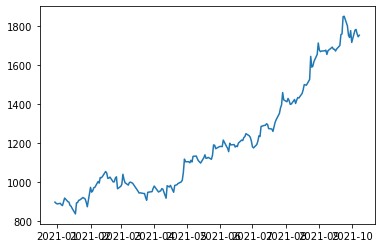

In [179]:
import matplotlib.pyplot as plt
plt.plot(df["Date"],df["Close"])


plt.savefig("E:\\PBS\\T1\\Statistics\\NIFTY50\\1.JPEG")
plt.show()